In [5]:
from zipfile import ZipFile
#file_name='FaceMaskDetect.zip'
files=ZipFile('FaceMaskDetection.zip','r')
files.extractall()
files.close()

In [6]:
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.preprocessing import image
from keras.models import Sequential
import cv2
import datetime

In [7]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
         rescale=1./255,
         shear_range=0.2,
         zoom_range=0.2,
         horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
training_set=train_datagen.flow_from_directory(
         'FaceMaskDetection-ML-Week-Day3-master/train',
          target_size=(150,150),
        batch_size=16,
        class_mode='binary')
test_set=test_datagen.flow_from_directory(
         'FaceMaskDetection-ML-Week-Day3-master/test',
          target_size=(150,150),
        batch_size=16,
        class_mode='binary')
model_saved=model.fit(
          training_set,
          epochs=50,
          validation_data=test_set,
    
          )

Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.
Epoch 1/50
83/83 [==============================] - 49s 573ms/step - loss: 0.3498 - accuracy: 0.8447 - val_loss: 0.1513 - val_accuracy: 0.9588
Epoch 2/50
 8/83 [=>............................] - ETA: 44s - loss: 0.1267 - accuracy: 0.9688

KeyboardInterrupt: 

In [19]:
from keras.models import load_model
mymodel=load_model('FaceMaskDetection-ML-Week-Day3-master/mymodel.h5')

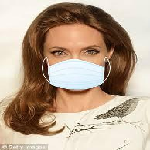

In [20]:
test_image=image.load_img(r'FaceMaskDetection-ML-Week-Day3-master/test/with_mask/23-with-mask.jpg',target_size=(150,150,3))
test_image

In [31]:
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
pred=mymodel.predict(test_image)[0][0]


if pred==0:
    print('Mask Detected')
else:
    print('No Mask Detected')

ValueError: Unsupported image shape: (1, 150, 150, 3)

In [35]:
cap=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier('FaceMaskDetection-ML-Week-Day3-master/cascade_face_default.xml')

In [36]:
while cap.isOpened():
    _,img=cap.read()
    face=face_cascade.detectMultiScale(img,scaleFactor=1.1,minNeighbors=4)
    
    for (x,y,w,h) in face:
        face_img=img[y:y+h,x:x+w]
        cv2.imwrite('FaceMaskDetection-ML-Week-Day3-master/exm.jpg',face_img)
        test_image=image.load_img(r'FaceMaskDetection-ML-Week-Day3-master/exm.jpg',target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image=np.expand_dims(test_image,axis=0)
        pred1=mymodel.predict(test_image)[0][0]
        #pred = np.argmax(pred1,)
        
        if pred==1:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
            cv2.putText(img,'NO MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),3)
        else:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
            cv2.putText(img,'MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)
        datet=str(datetime.datetime.now())
        cv2.putText(img,datet,(400,450),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)
        
        cv2.imshow('img',img)
    
    if cv2.waitKey(1)==ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()